In [167]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv


In [168]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

In [169]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [170]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

X= train_data[["Pclass","Age","SibSp","Parch","Fare","Sex","Embarked"]]


In [171]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                               ('scaler',StandardScaler())
                                       ])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                                          ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, ["Age","SibSp","Parch","Fare"]),
        ('cat', categorical_transformer, ["Sex","Embarked","Pclass"])
    ])

In [172]:
from sklearn.metrics import accuracy_score

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])



In [173]:
# from sklearn.model_selection import cross_val_score

# scores =  cross_val_score(my_pipeline, X, y,
#                               cv=5,
#                               scoring="accuracy")

# print("Accuracy scores:\n", scores)
# print("Average accuracy score (across experiments):")
# print(scores.mean())


In [174]:
def evaluate_model(X, y, model, folds, metric):
	# create the pipeline
	my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])
	#evaluate model
	scores = cross_val_score(my_pipeline, X, y, scoring=metric, cv=folds, n_jobs=-1)
	return scores

In [175]:
# evaluate a model and try to trap errors and and hide warnings
def robust_evaluate_model(X, y, model, folds, metric):
	scores = None
	try:
		with warnings.catch_warnings():
			warnings.filterwarnings("ignore")
			scores = evaluate_model(X, y, model, folds, metric)
	except:
		scores = None
	return scores

In [176]:
def evaluate_models(X, y, models, folds=10, metric='accuracy'):
	results = dict()
	for name, model in models.items():
		# evaluate the model
		scores = robust_evaluate_model(X, y, model, folds, metric)
		# show process
		if scores is not None:
			# store a result
			results[name] = scores
			mean_score, std_score = mean(scores), std(scores)
			print('>%s: %.3f (+/-%.3f)' % (name, mean_score, std_score))
		else:
			print('>%s: error' % name)
	return results

In [177]:
# binary classification spot check script
import warnings
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [178]:
def define_models(models=dict()):
	# linear models
	models['logistic'] = LogisticRegression()
	alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
	for a in alpha:
		models['ridge-'+str(a)] = RidgeClassifier(alpha=a)
	models['sgd'] = SGDClassifier(max_iter=1000, tol=1e-3)
	models['pa'] = PassiveAggressiveClassifier(max_iter=1000, tol=1e-3)
	# non-linear models
	n_neighbors = range(1, 21)
	for k in n_neighbors:
		models['knn-'+str(k)] = KNeighborsClassifier(n_neighbors=k)
	models['cart'] = DecisionTreeClassifier()
	models['extra'] = ExtraTreeClassifier()
	models['svml'] = SVC(kernel='linear')
	models['svmp'] = SVC(kernel='poly')
	c_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
	for c in c_values:
		models['svmr'+str(c)] = SVC(C=c)
	models['bayes'] = GaussianNB()
	# ensemble models
	n_trees = 100
	models['ada'] = AdaBoostClassifier(n_estimators=n_trees)
	models['bag'] = BaggingClassifier(n_estimators=n_trees)
	models['rf'] = RandomForestClassifier(n_estimators=n_trees)
	models['et'] = ExtraTreesClassifier(n_estimators=n_trees)
	models['gbm'] = GradientBoostingClassifier(n_estimators=n_trees)
	models['XGBoost']=XGBClassifier(n_estimators=n_trees)
	models['Catboost']=CatBoostClassifier(n_estimators=n_trees)
	print('Defined %d models' % len(models))
	return models

In [179]:
models = define_models()

Defined 55 models


In [180]:
results = evaluate_models(X, y, models)

>logistic: 0.799 (+/-0.027)
>ridge-0.1: 0.790 (+/-0.027)
>ridge-0.2: 0.790 (+/-0.027)
>ridge-0.3: 0.790 (+/-0.027)
>ridge-0.4: 0.790 (+/-0.027)
>ridge-0.5: 0.790 (+/-0.027)
>ridge-0.6: 0.790 (+/-0.027)
>ridge-0.7: 0.790 (+/-0.027)
>ridge-0.8: 0.790 (+/-0.027)
>ridge-0.9: 0.790 (+/-0.027)
>ridge-1.0: 0.790 (+/-0.027)
>sgd: 0.755 (+/-0.042)
>pa: 0.700 (+/-0.120)
>knn-1: 0.760 (+/-0.042)
>knn-2: 0.791 (+/-0.028)
>knn-3: 0.798 (+/-0.038)
>knn-4: 0.801 (+/-0.030)
>knn-5: 0.804 (+/-0.038)
>knn-6: 0.808 (+/-0.043)
>knn-7: 0.802 (+/-0.035)
>knn-8: 0.800 (+/-0.027)
>knn-9: 0.791 (+/-0.026)
>knn-10: 0.809 (+/-0.027)
>knn-11: 0.802 (+/-0.029)
>knn-12: 0.799 (+/-0.030)
>knn-13: 0.796 (+/-0.027)
>knn-14: 0.808 (+/-0.030)
>knn-15: 0.804 (+/-0.032)
>knn-16: 0.817 (+/-0.034)
>knn-17: 0.809 (+/-0.028)
>knn-18: 0.806 (+/-0.030)
>knn-19: 0.801 (+/-0.027)
>knn-20: 0.808 (+/-0.032)
>cart: 0.791 (+/-0.033)
>extra: 0.771 (+/-0.042)
>svml: 0.787 (+/-0.029)
>svmp: 0.824 (+/-0.046)
>svmr0.1: 0.813 (+/-0.027)
>s

In [181]:
# print and plot the top n results
def summarize_results(results, maximize=True, top_n=10):
	# check for no results
	if len(results) == 0:
		print('no results')
		return
	# determine how many results to summarize
	n = min(top_n, len(results))
	# create a list of (name, mean(scores)) tuples
	mean_scores = [(k,mean(v)) for k,v in results.items()]
	# sort tuples by mean score
	mean_scores = sorted(mean_scores, key=lambda x: x[1])
	# reverse for descending order (e.g. for accuracy)
	if maximize:
		mean_scores = list(reversed(mean_scores))
	# retrieve the top n for summarization
	names = [x[0] for x in mean_scores[:n]]
	scores = [results[x[0]] for x in mean_scores[:n]]
	# print the top n
	print()
	for i in range(n):
		name = names[i]
		mean_score, std_score = mean(results[name]), std(results[name])
		print('Rank=%d, Name=%s, Score=%.3f (+/- %.3f)' % (i+1, name, mean_score, std_score))
	# boxplot for the top n
	pyplot.boxplot(scores, labels=names)
	_, labels = pyplot.xticks()
	pyplot.setp(labels, rotation=90)
	pyplot.savefig('spotcheck.png')


Rank=1, Name=Catboost, Score=nan (+/- nan)
Rank=2, Name=XGBoost, Score=nan (+/- nan)
Rank=3, Name=gbm, Score=0.827 (+/- 0.040)
Rank=4, Name=svmr0.6, Score=0.826 (+/- 0.034)
Rank=5, Name=svmr0.5, Score=0.826 (+/- 0.031)
Rank=6, Name=svmr0.4, Score=0.826 (+/- 0.031)
Rank=7, Name=svmr0.3, Score=0.825 (+/- 0.032)
Rank=8, Name=svmp, Score=0.824 (+/- 0.046)
Rank=9, Name=svmr0.9, Score=0.824 (+/- 0.035)
Rank=10, Name=svmr0.8, Score=0.824 (+/- 0.034)


/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1262: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


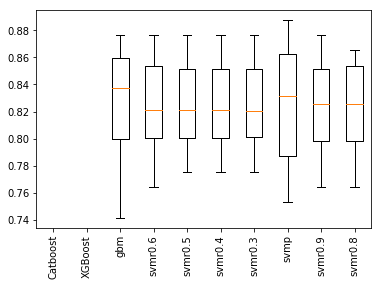

In [182]:
summarize_results(results)